In [1]:
from utils import CNNBackbone, get_device, SpectrogramDataset, CLASS_MAPPING, torch_train_val_split, Classifier, train, set_seed, plot_train_val_losses, test_model, get_classification_report
import torch.optim as optim
import numpy as np

DATA_PATH = "/home/alex/Downloads/archive(1)/data/"
EPOCHS = 1
LR = 1e-4
BATCH_SIZE = 32
RANDOM_SEED = 42
RNN_HIDDEN_SIZE = 64
NUM_CATEGORIES = 10
cnn_in_channels = 1
cnn_filters = [32, 64, 128, 256]
cnn_out_feature_size = 256
DEVICE = get_device()


In [2]:
mel_specs_test_data = SpectrogramDataset(DATA_PATH + "fma_genre_spectrograms/", class_mapping=CLASS_MAPPING, train=False)
mel_specs_train_data = SpectrogramDataset(DATA_PATH + "fma_genre_spectrograms/", class_mapping=CLASS_MAPPING, train=True)

mel_specs_test_dl, _ = torch_train_val_split(dataset=mel_specs_test_data, batch_eval=32, batch_train=32, val_size=.0, shuffle=False)
mel_specs_train_dl, mel_specs_val_dl = torch_train_val_split(dataset=mel_specs_train_data, batch_eval=32, batch_train=32, val_size=.2, shuffle=True)

### Overfit CNN model on one batch to make sure everything works

In [4]:
x_b1, y_b1, lengths_b1 = next(iter(mel_specs_train_dl))
input_shape = x_b1[0].shape

backbone = CNNBackbone(input_shape, cnn_in_channels, cnn_filters, cnn_out_feature_size)
model = Classifier(NUM_CATEGORIES, backbone)
model.to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=LR)

train(model, mel_specs_train_dl, mel_specs_val_dl, optimizer, EPOCHS, device=DEVICE, overfit_batch=True)

Training in overfitting mode...
Epoch 1, Loss at training set: 2.325338363647461
Epoch 20, Loss at training set: 0.013329865410923958
Epoch 40, Loss at training set: 9.57390170697181e-07
Epoch 60, Loss at training set: 8.131473805406131e-06
Epoch 80, Loss at training set: 1.0962041415041313e-05
Epoch 100, Loss at training set: 8.235795576183591e-06
Epoch 120, Loss at training set: 6.02709042141214e-06
Epoch 140, Loss at training set: 4.648912181437481e-06
Epoch 160, Loss at training set: 3.751207486857311e-06
Epoch 180, Loss at training set: 3.1291349387174705e-06
Epoch 200, Loss at training set: 2.6746804451249773e-06
Epoch 220, Loss at training set: 2.3282486836251337e-06
Epoch 240, Loss at training set: 2.0525908439594787e-06
Epoch 260, Loss at training set: 1.8290829757461324e-06
Epoch 280, Loss at training set: 1.6465509133922751e-06
Epoch 300, Loss at training set: 1.501269707659958e-06
Epoch 320, Loss at training set: 1.370888639939949e-06
Epoch 340, Loss at training set: 1.2516

Training started for model model_weights/cnn_genre_mel...
Epoch 1/1
	Average Training Loss: 10.235432431615632
	Average Validation Loss: 3.936456886927287


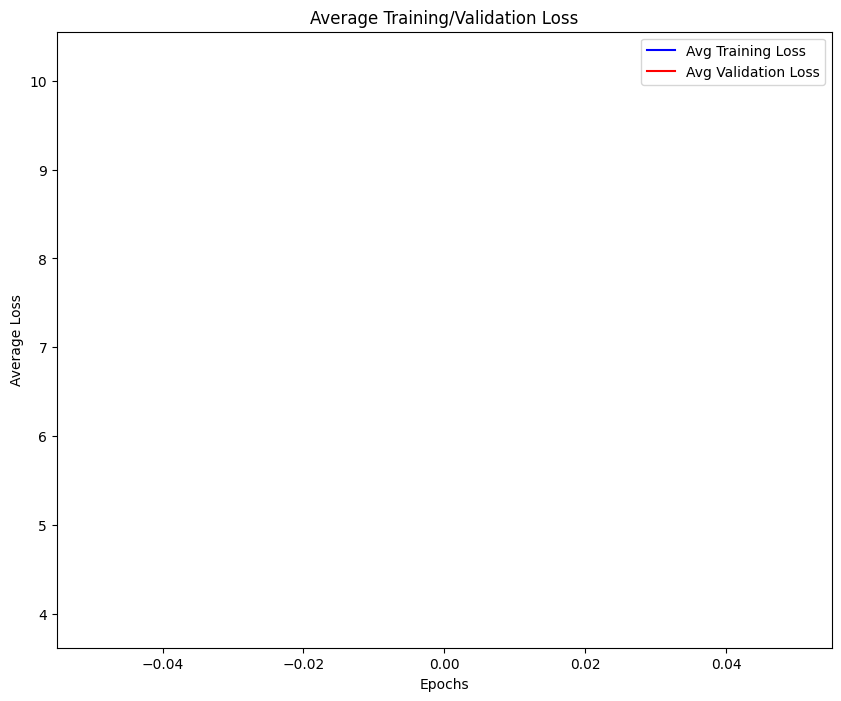

In [3]:
x_b1, y_b1, lengths_b1 = next(iter(mel_specs_train_dl))
input_shape = x_b1[0].shape
set_seed(RANDOM_SEED)
backbone = CNNBackbone(input_shape, cnn_in_channels, cnn_filters, cnn_out_feature_size)
set_seed(RANDOM_SEED)
model = Classifier(NUM_CATEGORIES, backbone)
model.to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=LR)

train_losses, val_losses = train(model, mel_specs_train_dl, mel_specs_val_dl, optimizer, 
                                 EPOCHS, save_path="model_weights/cnn_genre_mel.pth", device=DEVICE, overfit_batch=False)
plot_train_val_losses(train_losses, val_losses, save_title="assets/cnn_genre_train_val_losses.png")
mel_y_true, mel_y_pred = test_model(model, mel_specs_test_dl, DEVICE)

In [4]:
get_classification_report(np.hstack(mel_y_pred), np.hstack(mel_y_true))

              precision    recall  f1-score   support

           0       0.25      0.03      0.05        40
           1       1.00      0.03      0.05        40
           2       0.21      0.80      0.33        80
           3       0.38      0.31      0.34        80
           4       0.38      0.15      0.21        40
           5       0.15      0.15      0.15        40
           6       0.49      0.44      0.46        78
           7        nan      0.00      0.00        40
           8       0.45      0.20      0.28       103
           9       0.19      0.12      0.15        34

    accuracy                           0.28       575
   macro avg       0.39      0.22      0.20       575
weighted avg       0.39      0.28      0.25       575

Micro-average precision: 0.28
Micro-average recall: 0.28
Micro-average F1-score: 0.28
